In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# Importing dependencies

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

# Data collection and pre-processing

In [4]:
# Loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
# Checking the no. of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the categorical data

In [26]:
# Encoding the fuel_type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding the Seller_type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding the Seller_type column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipykernel_55/38952081.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [29]:
car_dataset.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
234,grand i10,2015,5.5,5.70,4492,0,0,0,0
61,etios cross,2015,4.5,7.70,40588,0,0,0,0
220,eon,2017,3.5,4.43,38488,0,0,0,0
277,city,2015,9.7,13.60,21780,0,0,0,0
222,i20,2014,6.0,7.60,77632,1,0,0,0


In [30]:
# Train_test_split

x=car_dataset.drop(['Selling_Price','Car_Name'],axis=1)
y=car_dataset['Selling_Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

# Model Training

In [31]:
# Linear Regression model 
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [32]:
# Model Evaluation on training data

y_pred_lr=lr.predict(x_train)
print(metrics.r2_score(y_train,y_pred_lr))

0.8806173715719129


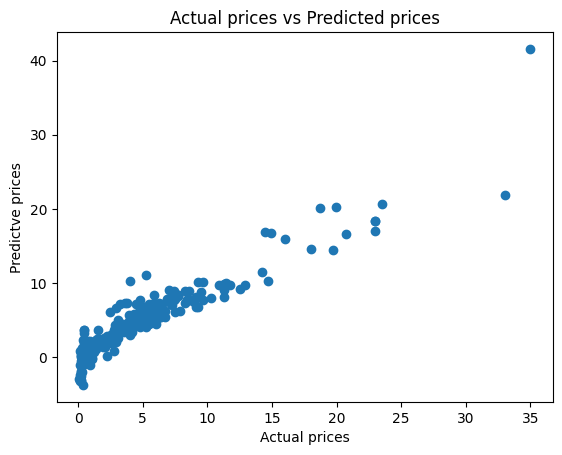

In [46]:
# Visualizing actual prices vs predicted prices of training data
plt.scatter(y_train,y_pred_lr)
plt.xlabel('Actual prices')
plt.ylabel('Predictve prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [33]:
# Model Evaluation on testing data

y_pred_lr_test=lr.predict(x_test)
print(metrics.r2_score(y_test,y_pred_lr_test))

0.8311069476244144


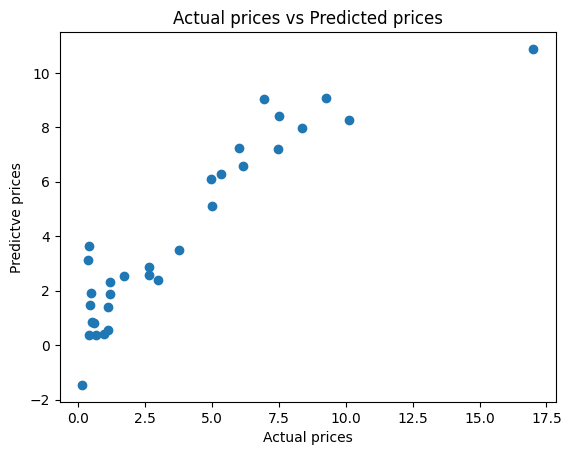

In [39]:
# Visualizing actual prices vs predicted prices of testing data
plt.scatter(y_test,y_pred_lr_test)
plt.xlabel('Actual prices')
plt.ylabel('Predictve prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [41]:
# Lasso Regression Model

ls=Lasso()

ls.fit(x_train,y_train)


Lasso()

In [42]:
# Model Evaluation on training data

y_pred_ls=ls.predict(x_train)
print(metrics.r2_score(y_train,y_pred_ls))

0.8436909482009372


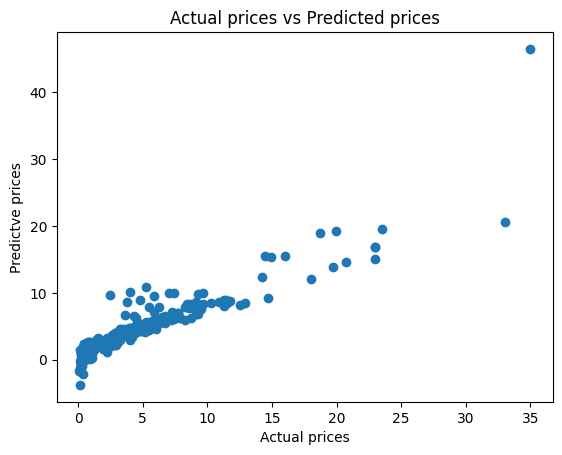

In [47]:
# Visualizing actual prices vs predicted prices of training data
plt.scatter(y_train,y_pred_ls)
plt.xlabel('Actual prices')
plt.ylabel('Predictve prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

In [43]:
# Model Evaluation on testing data

y_pred_ls_test=ls.predict(x_test)
print(metrics.r2_score(y_test,y_pred_ls_test))

0.839226320049874


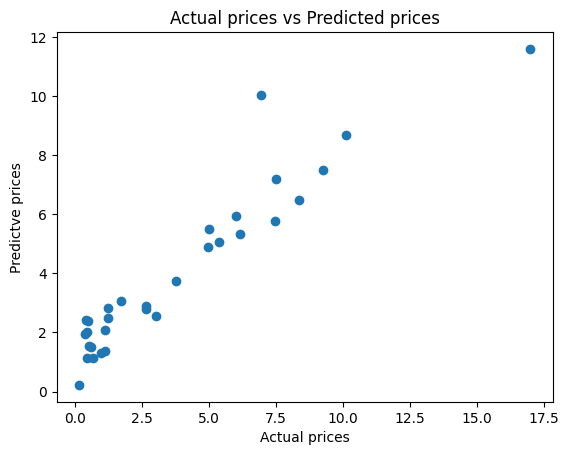

In [45]:
# Visualizing actual prices vs predicted prices of testing data
plt.scatter(y_test,y_pred_ls_test)
plt.xlabel('Actual prices')
plt.ylabel('Predictve prices')
plt.title('Actual prices vs Predicted prices')
plt.show()

# Making a predictive system

In [54]:
input_data = {
    'Year': 2014,
    'Present_Price': 5.59,
    'Kms_Driven': 27000,
    'Fuel_Type': 0,
    'Seller_Type': 0,
    'Transmission': 0,
    'Owner': 0
}

input_df = pd.DataFrame([input_data])

prediction = lr.predict(input_df)
print(prediction)

[3.83667866]
